In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1660,2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032
1661,2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,23214777872
1662,2022-05-29,1792.184448,1818.776611,1765.937378,1812.031006,1812.031006,10642556101
1663,2022-05-30,1811.885986,2005.210815,1804.456055,1996.441284,1996.441284,19580808705


In [5]:
df = df[['Date', 'Close']]

In [6]:
df

,Date,Close
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003
...,...,...
1660,2022-05-27,1724.922852
1661,2022-05-28,1757.941772
1662,2022-05-29,1812.031006
1663,2022-05-30,1996.441284


In [7]:
# Scale the values in the Close column
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_43035/3875126601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [8]:
df

,Date,Close
0,2017-11-09,0.050040
1,2017-11-10,0.045464
2,2017-11-11,0.048727
3,2017-11-12,0.047295
4,2017-11-13,0.049158
...,...,...
1660,2022-05-27,0.347016
1661,2022-05-28,0.354000
1662,2022-05-29,0.365441
1663,2022-05-30,0.404446


In [9]:
x_1, y_1 = create_look_back_arrays(df, 1)
x_3, y_3 = create_look_back_arrays(df, 3)
x_7, y_7 = create_look_back_arrays(df, 7)
x_15, y_15 = create_look_back_arrays(df, 15)
x_30, y_30 = create_look_back_arrays(df, 30)
x_60, y_60 = create_look_back_arrays(df, 60)

# 1 Day look back window

In [10]:
x_1.shape, y_1.shape

((1664, 1, 1), (1664, 1))

In [11]:
X_1_train, y_1_train = x_1[:1300], y_1[:1300]
X_1_val, y_1_val = x_1[1300:1500], y_1[1300:1500]
X_1_test, y_1_test = x_1[1500:], y_1[1500:]
X_1_train.shape, y_1_train.shape, X_1_val.shape, y_1_val.shape, X_1_test.shape, y_1_test.shape

((1300, 1, 1), (1300, 1), (200, 1, 1), (200, 1), (164, 1, 1), (164, 1))

In [12]:
model_1 = Sequential()
model_1.add(InputLayer(input_shape = (1, 1)))
model_1.add(LSTM(64,))
model_1.add(Dense(8, activation = 'relu'))
model_1.add(Dense(1, activation = 'linear'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
cp = ModelCheckpoint('models/lstm_1.h5', save_best_only = True)
model_1.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [14]:
model_1.fit(X_1_train, y_1_train, epochs = 200, validation_data = (X_1_val, y_1_val), callbacks = [cp])

Epoch 1/200
41/41 [==============================] - 1s 6ms/step - loss: 0.0289 - root_mean_squared_error: 0.1699 - mean_absolute_error: 0.0945 - val_loss: 0.5163 - val_root_mean_squared_error: 0.7185 - val_mean_absolute_error: 0.6934
Epoch 2/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0262 - root_mean_squared_error: 0.1617 - mean_absolute_error: 0.0838 - val_loss: 0.4905 - val_root_mean_squared_error: 0.7003 - val_mean_absolute_error: 0.6745
Epoch 3/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0234 - root_mean_squared_error: 0.1528 - mean_absolute_error: 0.0764 - val_loss: 0.4545 - val_root_mean_squared_error: 0.6742 - val_mean_absolute_error: 0.6481
Epoch 4/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0211 - root_mean_squared_error: 0.1451 - mean_absolute_error: 0.0743 - val_loss: 0.4258 - val_root_mean_squared_error: 0.6525 - val_mean_absolute_error: 0.6267
Epoch 5/200
 1/41 [..............................] - ETA: 0s

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 0s 1ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - mean_absolute_error: 0.0741 - val_loss: 0.4021 - val_root_mean_squared_error: 0.6341 - val_mean_absolute_error: 0.6083
Epoch 6/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - mean_absolute_error: 0.0741 - val_loss: 0.3829 - val_root_mean_squared_error: 0.6188 - val_mean_absolute_error: 0.5930
Epoch 7/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0173 - root_mean_squared_error: 0.1317 - mean_absolute_error: 0.0745 - val_loss: 0.3649 - val_root_mean_squared_error: 0.6041 - val_mean_absolute_error: 0.5782
Epoch 8/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - mean_absolute_error: 0.0752 - val_loss: 0.3486 - val_root_mean_squared_error: 0.5904 - val_mean_absolute_error: 0.5645
Epoch 9/200
41/41 [==============================] - 0s 1ms/step - loss:

In [15]:
model_1 = load_model('models/lstm_1.h5')

In [16]:
test_1_predictions = model_1.predict(X_1_test)
test_results = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': test_1_predictions.flatten()})
test_results

6/6 [==============================] - 0s 596us/step


,Actual,Predicted
0,0.811858,0.795763
1,0.814238,0.789513
2,0.832516,0.791350
3,0.824444,0.805475
4,0.851078,0.799234
...,...,...
159,0.347016,0.368029
160,0.354000,0.350615
161,0.365441,0.357889
162,0.404446,0.369821


In [17]:
# Creating a dataframe with the actual and predicted values without the scaling 
test_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(df[['Close']])[1501:].flatten(), 'Predicted': scaler.inverse_transform(test_1_predictions).flatten()})
test_results_unscaled

,Actual,Predicted
0,3922.592529,3846.497803
1,3933.844482,3816.952148
2,4020.260010,3825.636963
3,3982.099609,3892.417969
4,4108.015625,3862.909912
...,...,...
159,1724.922852,1824.268677
160,1757.941772,1741.940552
161,1812.031006,1776.327515
162,1996.441284,1832.742065


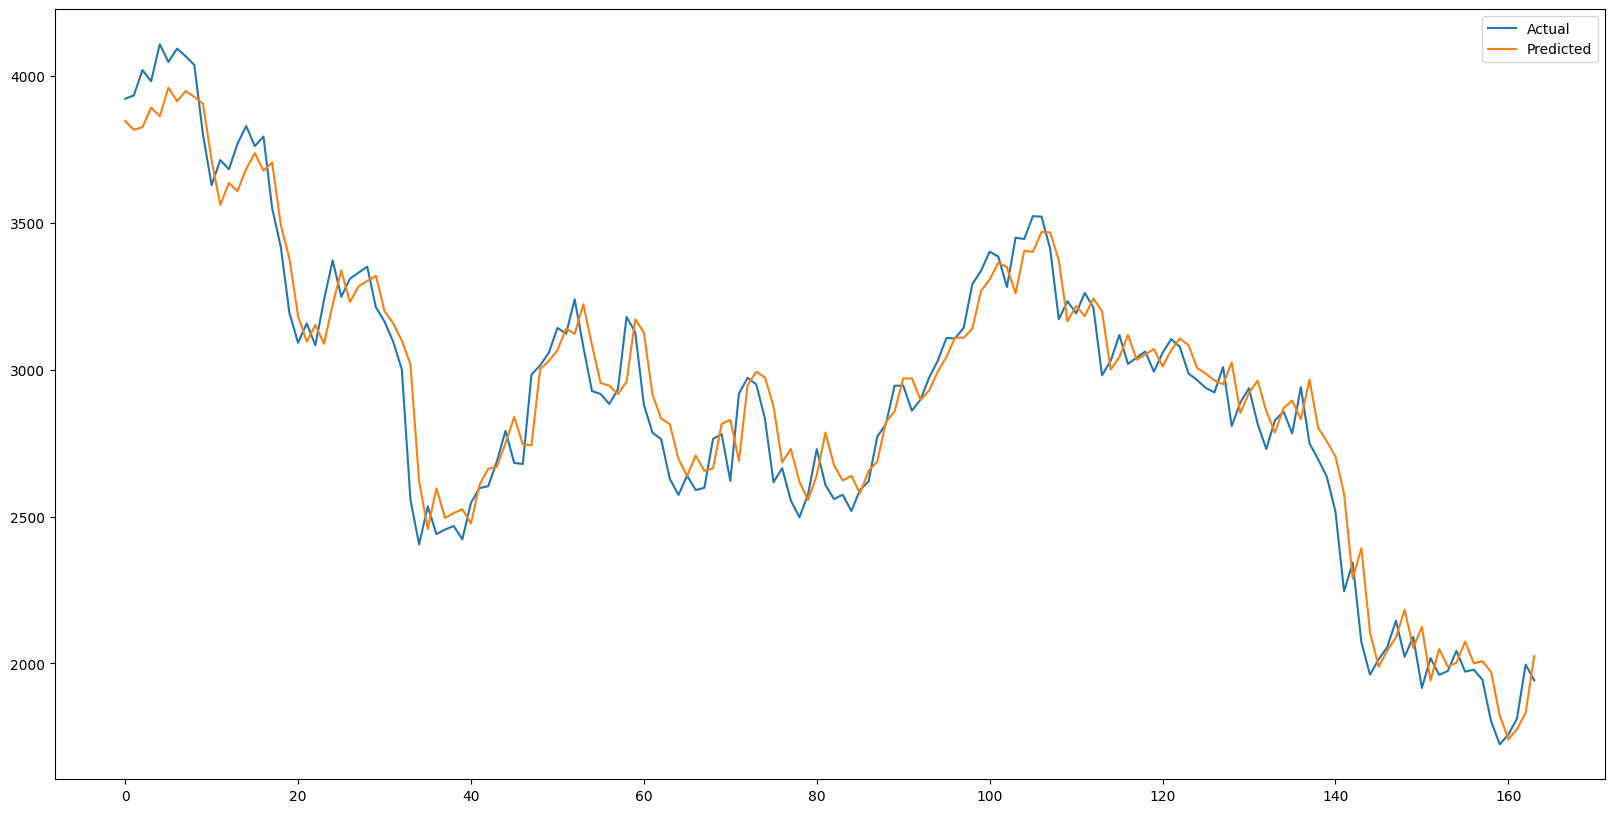

In [18]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [19]:
# Calculating the RMSE and MAE
rmse = np.sqrt(np.mean((test_results_unscaled['Actual'] - test_results_unscaled['Predicted'])**2))
mae = np.mean(np.abs(test_results_unscaled['Actual'] - test_results_unscaled['Predicted']))
rmse, mae

(120.16637598829698, 95.12932307545732)

# 3 Day Look Back Window

In [20]:
x_3.shape, y_3.shape

((1662, 3, 1), (1662, 1))

In [21]:
X_3_train, y_3_train = x_3[:1300], y_3[:1300]
X_3_val, y_3_val = x_3[1300:1500], y_3[1300:1500]
X_3_test, y_3_test = x_3[1500:], y_3[1500:]
X_3_train.shape, y_3_train.shape, X_3_val.shape, y_3_val.shape, X_3_test.shape, y_3_test.shape

((1300, 3, 1), (1300, 1), (200, 3, 1), (200, 1), (162, 3, 1), (162, 1))

In [22]:
model_3 = Sequential()
model_3.add(InputLayer(input_shape = (3, 1)))
model_3.add(LSTM(64))
model_3.add(Dense(8, activation = 'relu'))
model_3.add(Dense(1, activation = 'linear'))

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
cp3 = ModelCheckpoint('models/lstm_3.h5', save_best_only = True)
model_3.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [24]:
model_3.fit(X_3_train, y_3_train, epochs = 200, validation_data = (X_3_val, y_3_val), callbacks = [cp3])

Epoch 1/200
41/41 [==============================] - 1s 6ms/step - loss: 0.0279 - root_mean_squared_error: 0.1670 - mean_absolute_error: 0.0943 - val_loss: 0.4879 - val_root_mean_squared_error: 0.6985 - val_mean_absolute_error: 0.6747
Epoch 2/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0265 - root_mean_squared_error: 0.1629 - mean_absolute_error: 0.0897 - val_loss: 0.4814 - val_root_mean_squared_error: 0.6938 - val_mean_absolute_error: 0.6699
Epoch 3/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0259 - root_mean_squared_error: 0.1608 - mean_absolute_error: 0.0862 - val_loss: 0.4763 - val_root_mean_squared_error: 0.6901 - val_mean_absolute_error: 0.6661
Epoch 4/200
 1/41 [..............................] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1368 - mean_absolute_error: 0.0874

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 0s 2ms/step - loss: 0.0252 - root_mean_squared_error: 0.1588 - mean_absolute_error: 0.0833 - val_loss: 0.4714 - val_root_mean_squared_error: 0.6866 - val_mean_absolute_error: 0.6625
Epoch 5/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - root_mean_squared_error: 0.1570 - mean_absolute_error: 0.0808 - val_loss: 0.4667 - val_root_mean_squared_error: 0.6832 - val_mean_absolute_error: 0.6589
Epoch 6/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - mean_absolute_error: 0.0787 - val_loss: 0.4620 - val_root_mean_squared_error: 0.6797 - val_mean_absolute_error: 0.6553
Epoch 7/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - root_mean_squared_error: 0.1536 - mean_absolute_error: 0.0771 - val_loss: 0.4575 - val_root_mean_squared_error: 0.6764 - val_mean_absolute_error: 0.6519
Epoch 8/200
41/41 [==============================] - 0s 2ms/step - loss:

In [25]:
model_3 = load_model('models/lstm_3.h5')

In [26]:
test_3_predictions = model_3.predict(X_3_test)
test_3_results = pd.DataFrame({'Actual': y_3_test.flatten(), 'Predicted': test_3_predictions.flatten()})
test_3_results

6/6 [==============================] - 0s 671us/step


,Actual,Predicted
0,0.832516,0.800984
1,0.824444,0.806063
2,0.851078,0.809018
3,0.838380,0.819608
4,0.847961,0.821099
...,...,...
157,0.347016,0.391456
158,0.354000,0.372212
159,0.365441,0.361845
160,0.404446,0.364888


In [27]:
# Creating a dataframe with the actual and predicted values without the scaling
test_3_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(df[['Close']])[1503:].flatten(), 'Predicted': scaler.inverse_transform(test_3_predictions).flatten()})

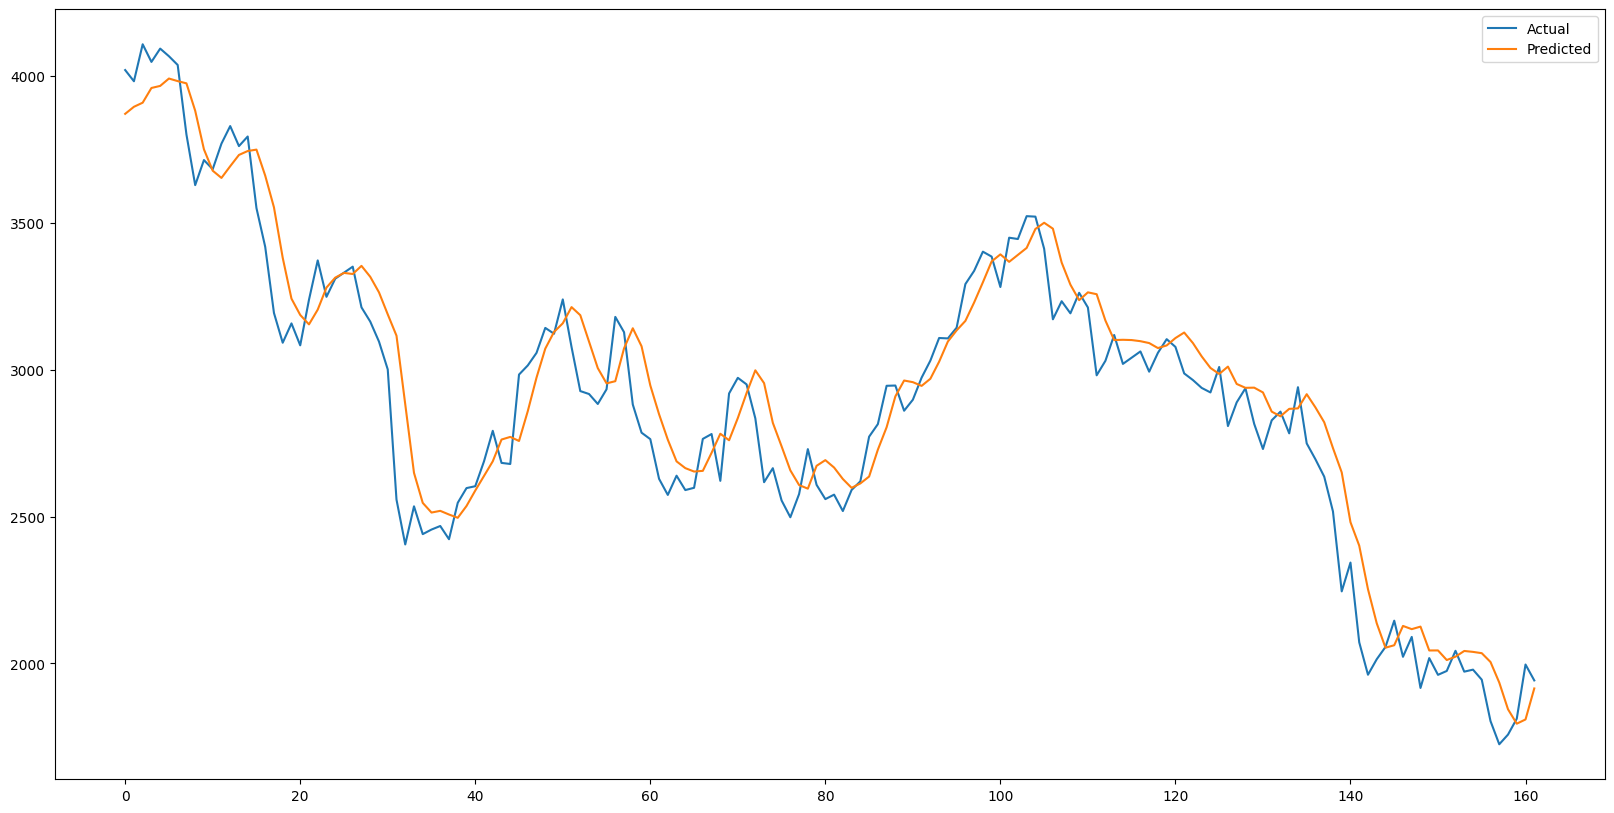

In [28]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_3_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_3_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [29]:
# Calculating the RMSE and MAE
rmse_3 = np.sqrt(np.mean((test_3_results_unscaled['Actual'] - test_3_results_unscaled['Predicted'])**2))
mae_3 = np.mean(np.abs(test_3_results_unscaled['Actual'] - test_3_results_unscaled['Predicted']))
rmse_3, mae_3

(148.23651845312432, 115.52561818817516)

# 7 Day Look Back Window

In [30]:
x_7.shape, y_7.shape

((1658, 7, 1), (1658, 1))

In [31]:
X_7_train, y_7_train = x_7[:1300], y_7[:1300]
X_7_val, y_7_val = x_7[1300:1500], y_7[1300:1500]
X_7_test, y_7_test = x_7[1500:], y_7[1500:]
X_7_train.shape, y_7_train.shape, X_7_val.shape, y_7_val.shape, X_7_test.shape, y_7_test.shape

((1300, 7, 1), (1300, 1), (200, 7, 1), (200, 1), (158, 7, 1), (158, 1))

In [32]:
model_7 = Sequential()
model_7.add(InputLayer(input_shape = (7, 1)))
model_7.add(LSTM(64))
model_7.add(Dense(8, activation = 'relu'))
model_7.add(Dense(1, activation = 'linear'))

model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
cp7 = ModelCheckpoint('models/lstm_7.h5', save_best_only = True)
model_7.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [34]:
model_7.fit(X_7_train, y_7_train, epochs = 200, validation_data = (X_7_val, y_7_val), callbacks = [cp7])

Epoch 1/200
41/41 [==============================] - 1s 6ms/step - loss: 0.0244 - root_mean_squared_error: 0.1563 - mean_absolute_error: 0.0843 - val_loss: 0.3924 - val_root_mean_squared_error: 0.6265 - val_mean_absolute_error: 0.6042
Epoch 2/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0179 - root_mean_squared_error: 0.1337 - mean_absolute_error: 0.0673 - val_loss: 0.3035 - val_root_mean_squared_error: 0.5509 - val_mean_absolute_error: 0.5297
Epoch 3/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - mean_absolute_error: 0.0602 - val_loss: 0.2193 - val_root_mean_squared_error: 0.4682 - val_mean_absolute_error: 0.4484
Epoch 4/200
 1/41 [..............................] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1251 - mean_absolute_error: 0.0795

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 0s 2ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - mean_absolute_error: 0.0552 - val_loss: 0.1470 - val_root_mean_squared_error: 0.3834 - val_mean_absolute_error: 0.3653
Epoch 5/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - mean_absolute_error: 0.0503 - val_loss: 0.0817 - val_root_mean_squared_error: 0.2858 - val_mean_absolute_error: 0.2699
Epoch 6/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - mean_absolute_error: 0.0411 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1961 - val_mean_absolute_error: 0.1825
Epoch 7/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - mean_absolute_error: 0.0299 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1154 - val_mean_absolute_error: 0.1025
Epoch 8/200
41/41 [==============================] - 0s 2ms/step - loss:

In [35]:
model_7 = load_model('models/lstm_7.h5')

In [36]:
test_7_predictions = model_7.predict(X_7_test)
test_7_results = pd.DataFrame({'Actual': y_7_test.flatten(), 'Predicted': test_7_predictions.flatten()})
test_7_results

5/5 [==============================] - 0s 943us/step


,Actual,Predicted
0,0.847961,0.816954
1,0.842472,0.821786
2,0.836173,0.823135
3,0.786116,0.821476
4,0.749659,0.806067
...,...,...
153,0.347016,0.401171
154,0.354000,0.387504
155,0.365441,0.377644
156,0.404446,0.373878


In [37]:
# Creating a dataframe with the actual and predicted values without the scaling
test_7_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(df[['Close']])[1507:].flatten(), 'Predicted': scaler.inverse_transform(test_7_predictions).flatten()})

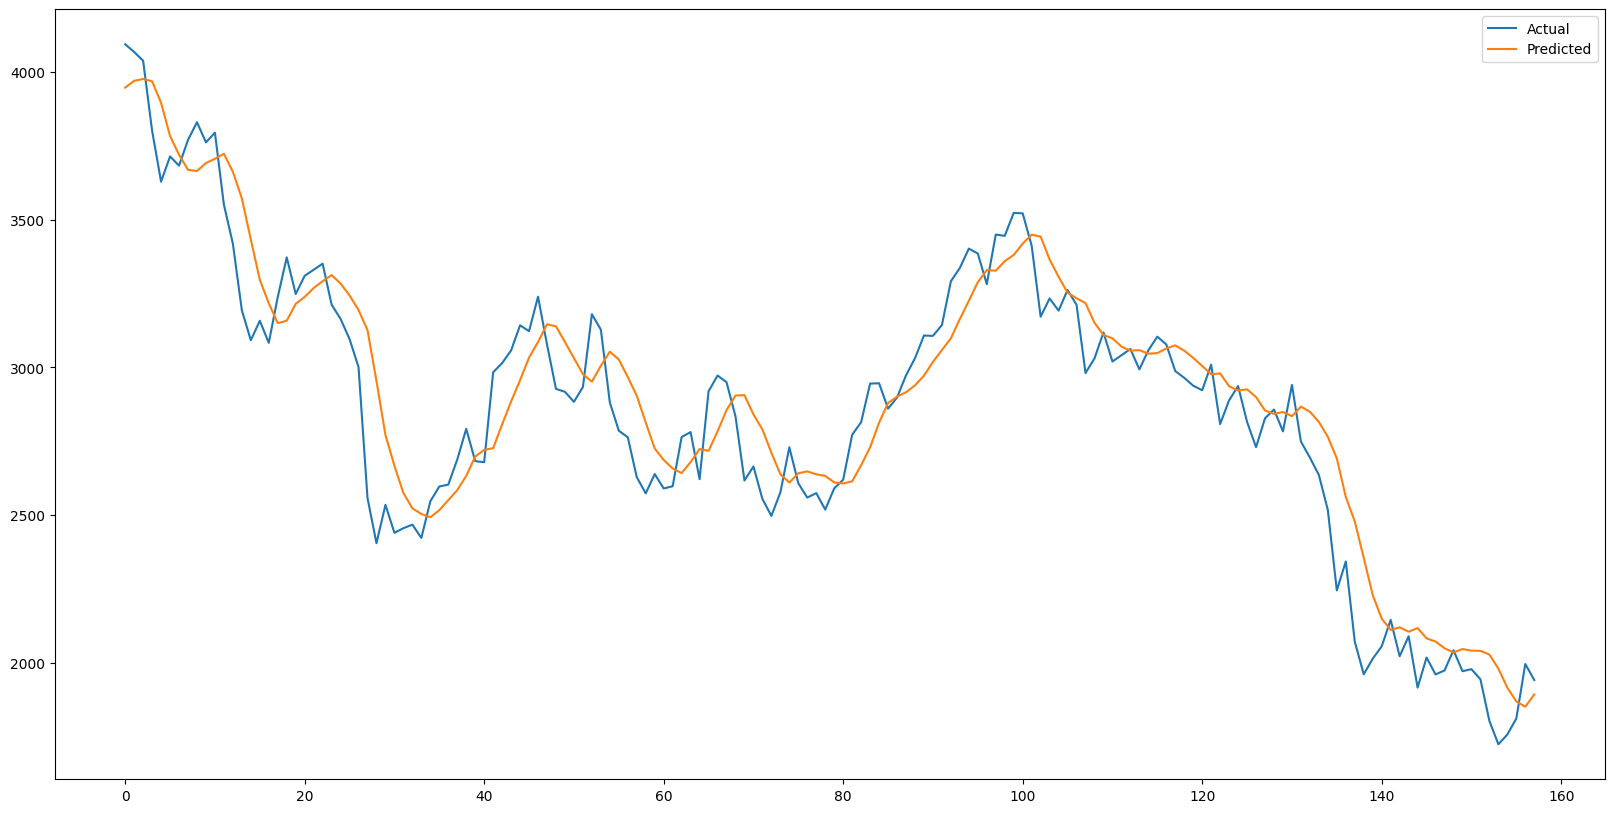

In [38]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_7_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_7_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [39]:
rmse_7 = np.sqrt(np.mean((test_7_results_unscaled['Actual'] - test_7_results_unscaled['Predicted'])**2))
mae_7 = np.mean(np.abs(test_7_results_unscaled['Actual'] - test_7_results_unscaled['Predicted']))
rmse_7, mae_7

(163.40465403429656, 130.68450541435917)

# 15 Day Look Back Window

In [40]:
x_15.shape, y_15.shape

((1650, 15, 1), (1650, 1))

In [41]:
X_15_train, y_15_train = x_15[:1300], y_15[:1300]
X_15_val, y_15_val = x_15[1300:1500], y_15[1300:1500]
X_15_test, y_15_test = x_15[1500:], y_15[1500:]
X_15_train.shape, y_15_train.shape, X_15_val.shape, y_15_val.shape, X_15_test.shape, y_15_test.shape

((1300, 15, 1), (1300, 1), (200, 15, 1), (200, 1), (150, 15, 1), (150, 1))

In [42]:
model_15 = Sequential()
model_15.add(InputLayer(input_shape = (15, 1)))
model_15.add(LSTM(64))
model_15.add(Dense(8, activation = 'relu'))
model_15.add(Dense(1, activation = 'linear'))

model_15.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
cp15 = ModelCheckpoint('models/lstm_15.h5', save_best_only = True)
model_15.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [44]:
model_15.fit(X_15_train, y_15_train, epochs = 200, validation_data = (X_15_val, y_15_val), callbacks = [cp15])

Epoch 1/200
41/41 [==============================] - 1s 8ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - mean_absolute_error: 0.0801 - val_loss: 0.2918 - val_root_mean_squared_error: 0.5401 - val_mean_absolute_error: 0.5207
Epoch 2/200
41/41 [==============================] - 0s 4ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - mean_absolute_error: 0.0589 - val_loss: 0.1224 - val_root_mean_squared_error: 0.3498 - val_mean_absolute_error: 0.3337
Epoch 3/200
 1/41 [..............................] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0741 - mean_absolute_error: 0.0527

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - root_mean_squared_error: 0.0731 - mean_absolute_error: 0.0538 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1867 - val_mean_absolute_error: 0.1722
Epoch 4/200
41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - mean_absolute_error: 0.0389 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806 - val_mean_absolute_error: 0.0657
Epoch 5/200
41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - mean_absolute_error: 0.0227 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728 - val_mean_absolute_error: 0.0606
Epoch 6/200
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - mean_absolute_error: 0.0153 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749 - val_mean_absolute_error: 0.0620
Epoch 7/200
41/41 [==============================] - 0s 3ms/step - loss:

In [45]:
model_15 = load_model('models/lstm_15.h5')

In [46]:
test_15_predictions = model_15.predict(X_15_test)
test_15_results = pd.DataFrame({'Actual': y_15_test.flatten(), 'Predicted': test_15_predictions.flatten()})
test_15_results

5/5 [==============================] - 0s 1ms/step


,Actual,Predicted
0,0.792181,0.735904
1,0.777759,0.744468
2,0.784670,0.747412
3,0.733130,0.753080
4,0.705215,0.738469
...,...,...
145,0.347016,0.406103
146,0.354000,0.391144
147,0.365441,0.382061
148,0.404446,0.379623


In [47]:
# Creating a dataframe with the actual and predicted values without the scaling
test_15_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(df[['Close']])[1515:].flatten(), 'Predicted': scaler.inverse_transform(test_15_predictions).flatten()})

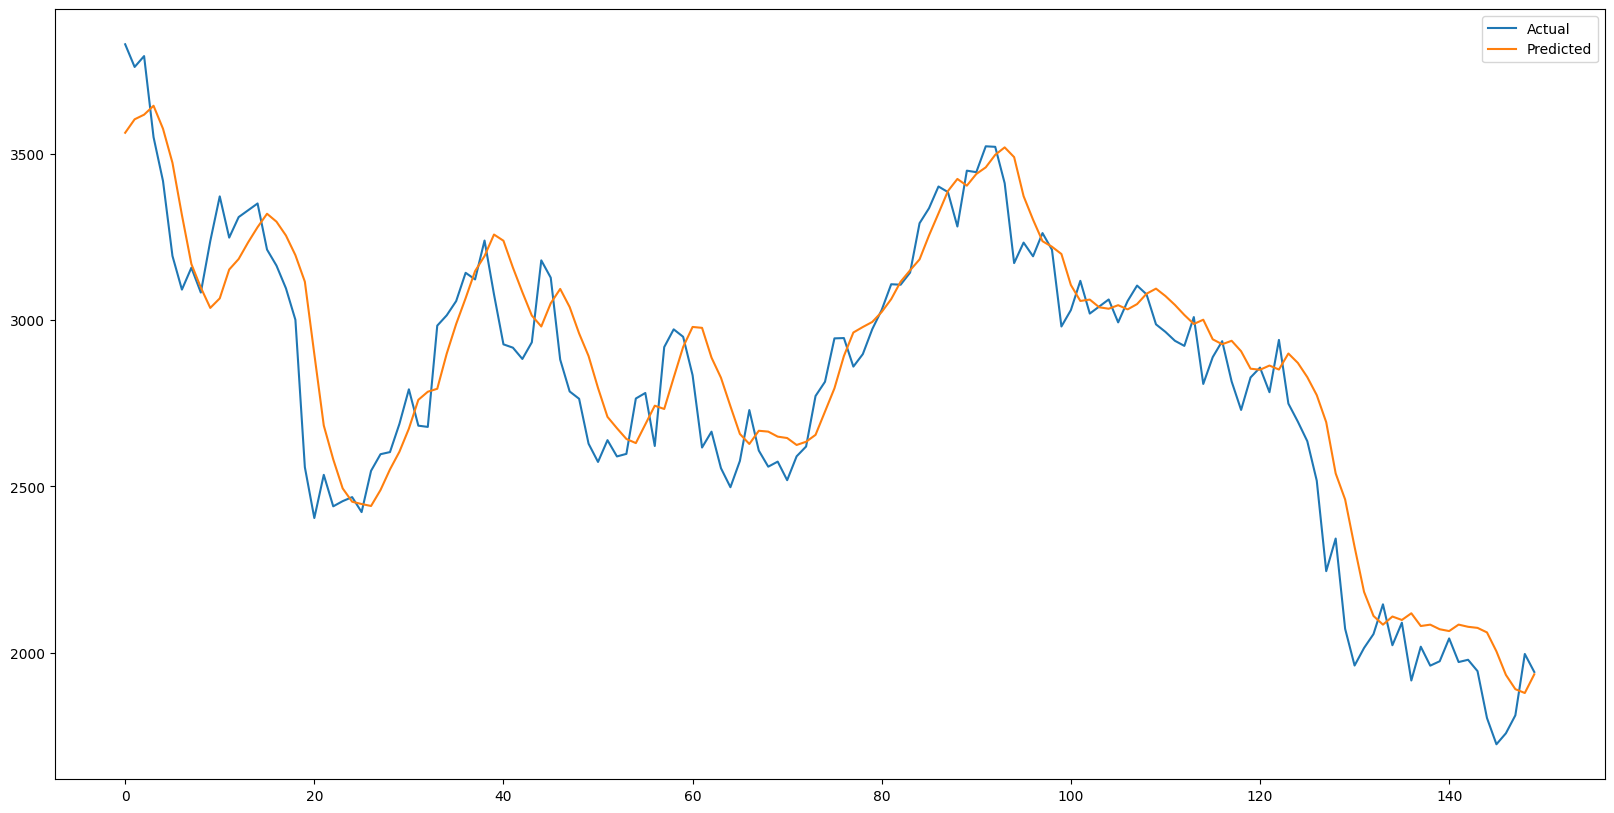

In [48]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_15_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_15_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [49]:
rmse_15 = np.sqrt(np.mean((test_15_results_unscaled['Actual'] - test_15_results_unscaled['Predicted'])**2))
mae_15 = np.mean(np.abs(test_15_results_unscaled['Actual'] - test_15_results_unscaled['Predicted']))
rmse_15, mae_15

(159.6752330889521, 124.42100504557291)

# 30 Day Look Back Window

In [50]:
x_30.shape, y_30.shape

((1635, 30, 1), (1635, 1))

In [51]:
X_30_train, y_30_train = x_30[:1300], y_30[:1300]
X_30_val, y_30_val = x_30[1300:1500], y_30[1300:1500]
X_30_test, y_30_test = x_30[1500:], y_30[1500:]
X_30_train.shape, y_30_train.shape, X_30_val.shape, y_30_val.shape, X_30_test.shape, y_30_test.shape

((1300, 30, 1), (1300, 1), (200, 30, 1), (200, 1), (135, 30, 1), (135, 1))

In [52]:
model_30 = Sequential()
model_30.add(InputLayer(input_shape = (30, 1)))
model_30.add(LSTM(64))
model_30.add(Dense(8, activation = 'relu'))
model_30.add(Dense(1, activation = 'linear'))

model_30.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
cp30 = ModelCheckpoint('models/lstm_30.h5', save_best_only = True)
model_30.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [54]:
model_30.fit(X_30_train, y_30_train, epochs = 200, validation_data = (X_30_val, y_30_val), callbacks = [cp30])

Epoch 1/200
41/41 [==============================] - 1s 13ms/step - loss: 0.0349 - root_mean_squared_error: 0.1867 - mean_absolute_error: 0.1048 - val_loss: 0.5232 - val_root_mean_squared_error: 0.7234 - val_mean_absolute_error: 0.7054
Epoch 2/200
31/41 [=====================>........] - ETA: 0s - loss: 0.0289 - root_mean_squared_error: 0.1699 - mean_absolute_error: 0.0895

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 0s 6ms/step - loss: 0.0267 - root_mean_squared_error: 0.1633 - mean_absolute_error: 0.0854 - val_loss: 0.4143 - val_root_mean_squared_error: 0.6437 - val_mean_absolute_error: 0.6265
Epoch 3/200
41/41 [==============================] - 0s 6ms/step - loss: 0.0185 - root_mean_squared_error: 0.1362 - mean_absolute_error: 0.0690 - val_loss: 0.2639 - val_root_mean_squared_error: 0.5137 - val_mean_absolute_error: 0.4983
Epoch 4/200
41/41 [==============================] - 0s 6ms/step - loss: 0.0078 - root_mean_squared_error: 0.0885 - mean_absolute_error: 0.0518 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734 - val_mean_absolute_error: 0.1535
Epoch 5/200
41/41 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - mean_absolute_error: 0.0256 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834 - val_mean_absolute_error: 0.0688
Epoch 6/200
41/41 [==============================] - 0s 6ms/step - loss:

In [55]:
model_30 = load_model('models/lstm_30.h5')

In [56]:
test_30_predictions = model_30.predict(X_30_test)
test_30_results = pd.DataFrame({'Actual': y_30_test.flatten(), 'Predicted': test_30_predictions.flatten()})
test_30_results

5/5 [==============================] - 0s 2ms/step


,Actual,Predicted
0,0.661621,0.697700
1,0.651409,0.684396
2,0.636984,0.669271
3,0.616952,0.652402
4,0.523210,0.632951
...,...,...
130,0.347016,0.415793
131,0.354000,0.397023
132,0.365441,0.387172
133,0.404446,0.386088


In [57]:
# Creating a dataframe with the actual and predicted values without the scaling
test_30_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(df[['Close']])[1530:].flatten(), 'Predicted': scaler.inverse_transform(test_30_predictions).flatten()})

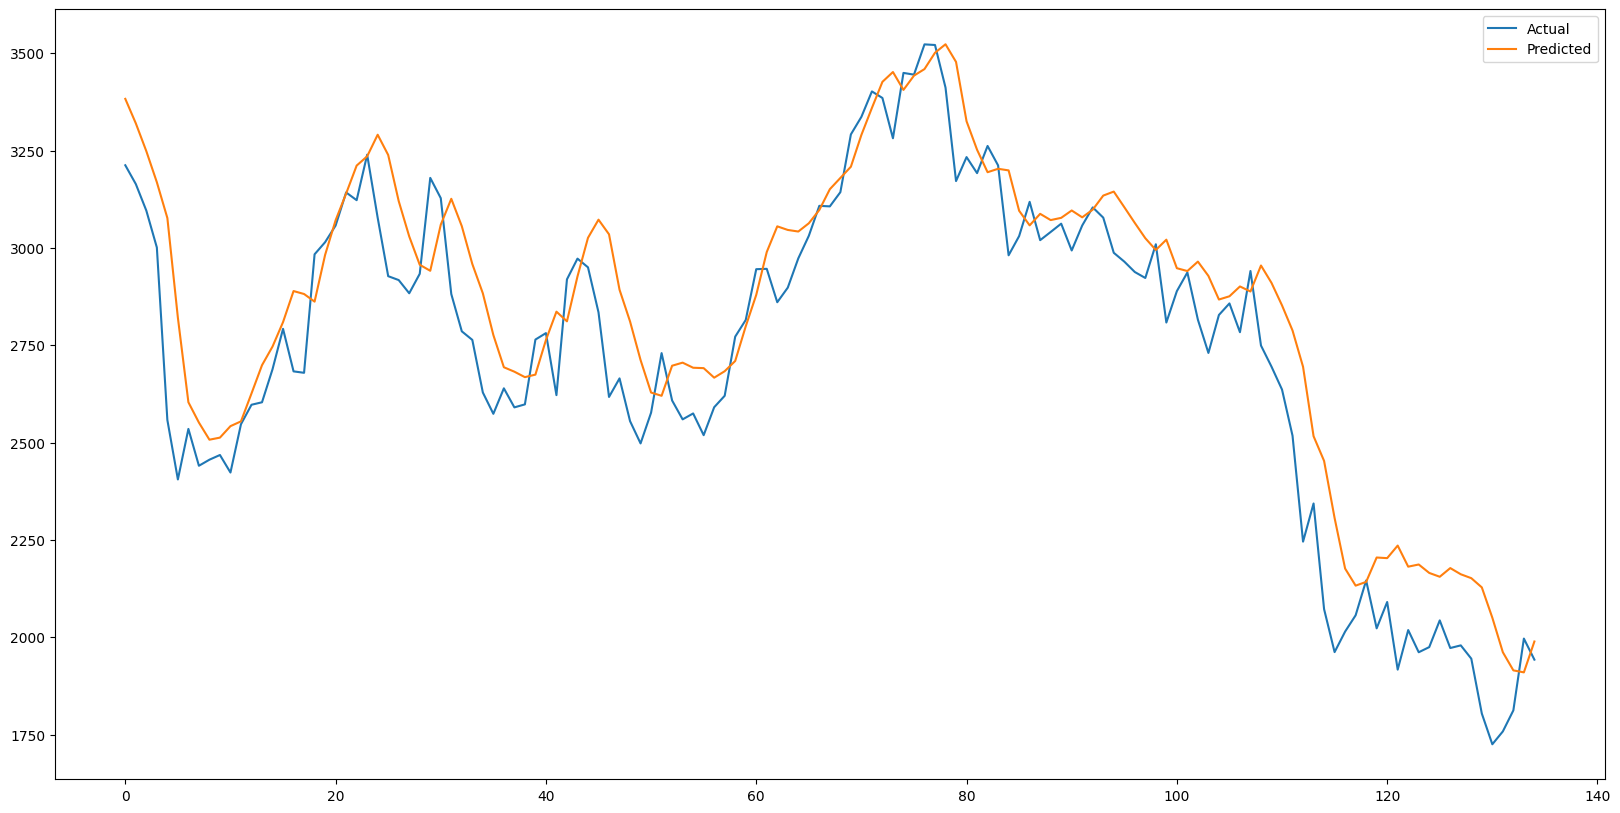

In [58]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_30_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_30_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [59]:
rmse_30 = np.sqrt(np.mean((test_30_results_unscaled['Actual'] - test_30_results_unscaled['Predicted'])**2))
mae_30 = np.mean(np.abs(test_30_results_unscaled['Actual'] - test_30_results_unscaled['Predicted']))
rmse_30, mae_30

(166.7607540497715, 130.1637622974537)

# 60 Day Look Back Window

In [60]:
x_60.shape, y_60.shape

((1605, 60, 1), (1605, 1))

In [61]:
X_60_train, y_60_train = x_60[:1300], y_60[:1300]
X_60_val, y_60_val = x_60[1300:1500], y_60[1300:1500]
X_60_test, y_60_test = x_60[1500:], y_60[1500:]
X_60_train.shape, y_60_train.shape, X_60_val.shape, y_60_val.shape, X_60_test.shape, y_60_test.shape

((1300, 60, 1), (1300, 1), (200, 60, 1), (200, 1), (105, 60, 1), (105, 1))

In [62]:
model_60 = Sequential()
model_60.add(InputLayer(input_shape = (60, 1)))
model_60.add(LSTM(64))
model_60.add(Dense(8, activation = 'relu'))
model_60.add(Dense(1, activation = 'linear'))

model_60.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
cp60 = ModelCheckpoint('models/lstm_60.h5', save_best_only = True)
model_60.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [64]:
model_60.fit(X_60_train, y_60_train, epochs = 200, validation_data = (X_60_val, y_60_val), callbacks = [cp60])

Epoch 1/200
41/41 [==============================] - 1s 15ms/step - loss: 0.0363 - root_mean_squared_error: 0.1906 - mean_absolute_error: 0.1079 - val_loss: 0.5236 - val_root_mean_squared_error: 0.7236 - val_mean_absolute_error: 0.7126
Epoch 2/200
19/41 [============>.................] - ETA: 0s - loss: 0.0317 - root_mean_squared_error: 0.1782 - mean_absolute_error: 0.0982

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 0s 11ms/step - loss: 0.0310 - root_mean_squared_error: 0.1761 - mean_absolute_error: 0.0962 - val_loss: 0.4842 - val_root_mean_squared_error: 0.6958 - val_mean_absolute_error: 0.6850
Epoch 3/200
41/41 [==============================] - 0s 11ms/step - loss: 0.0275 - root_mean_squared_error: 0.1659 - mean_absolute_error: 0.0875 - val_loss: 0.4294 - val_root_mean_squared_error: 0.6553 - val_mean_absolute_error: 0.6446
Epoch 4/200
41/41 [==============================] - 0s 11ms/step - loss: 0.0205 - root_mean_squared_error: 0.1431 - mean_absolute_error: 0.0758 - val_loss: 0.2196 - val_root_mean_squared_error: 0.4686 - val_mean_absolute_error: 0.4552
Epoch 5/200
41/41 [==============================] - 0s 11ms/step - loss: 0.0059 - root_mean_squared_error: 0.0766 - mean_absolute_error: 0.0578 - val_loss: 0.0682 - val_root_mean_squared_error: 0.2612 - val_mean_absolute_error: 0.2326
Epoch 6/200
41/41 [==============================] - 0s 11ms/step - 

In [65]:
model_60 = load_model('models/lstm_60.h5')

In [66]:
test_60_predictions = model_60.predict(X_60_test)
test_60_results = pd.DataFrame({'Actual': y_60_test.flatten(), 'Predicted': test_60_predictions.flatten()})

4/4 [==============================] - 0s 3ms/step


In [67]:
# Creating a dataframe with the actual and predicted values without the scaling
test_60_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(df[['Close']])[1560:].flatten(), 'Predicted': scaler.inverse_transform(test_60_predictions).flatten()})
test_60_results_unscaled

,Actual,Predicted
0,3127.830078,2613.443848
1,2881.481934,2638.525879
2,2785.727539,2657.655273
3,2763.701172,2672.966064
4,2628.648438,2685.840820
...,...,...
100,1724.922852,2101.181152
101,1757.941772,2074.741211
102,1812.031006,2050.200439
103,1996.441284,2028.259766


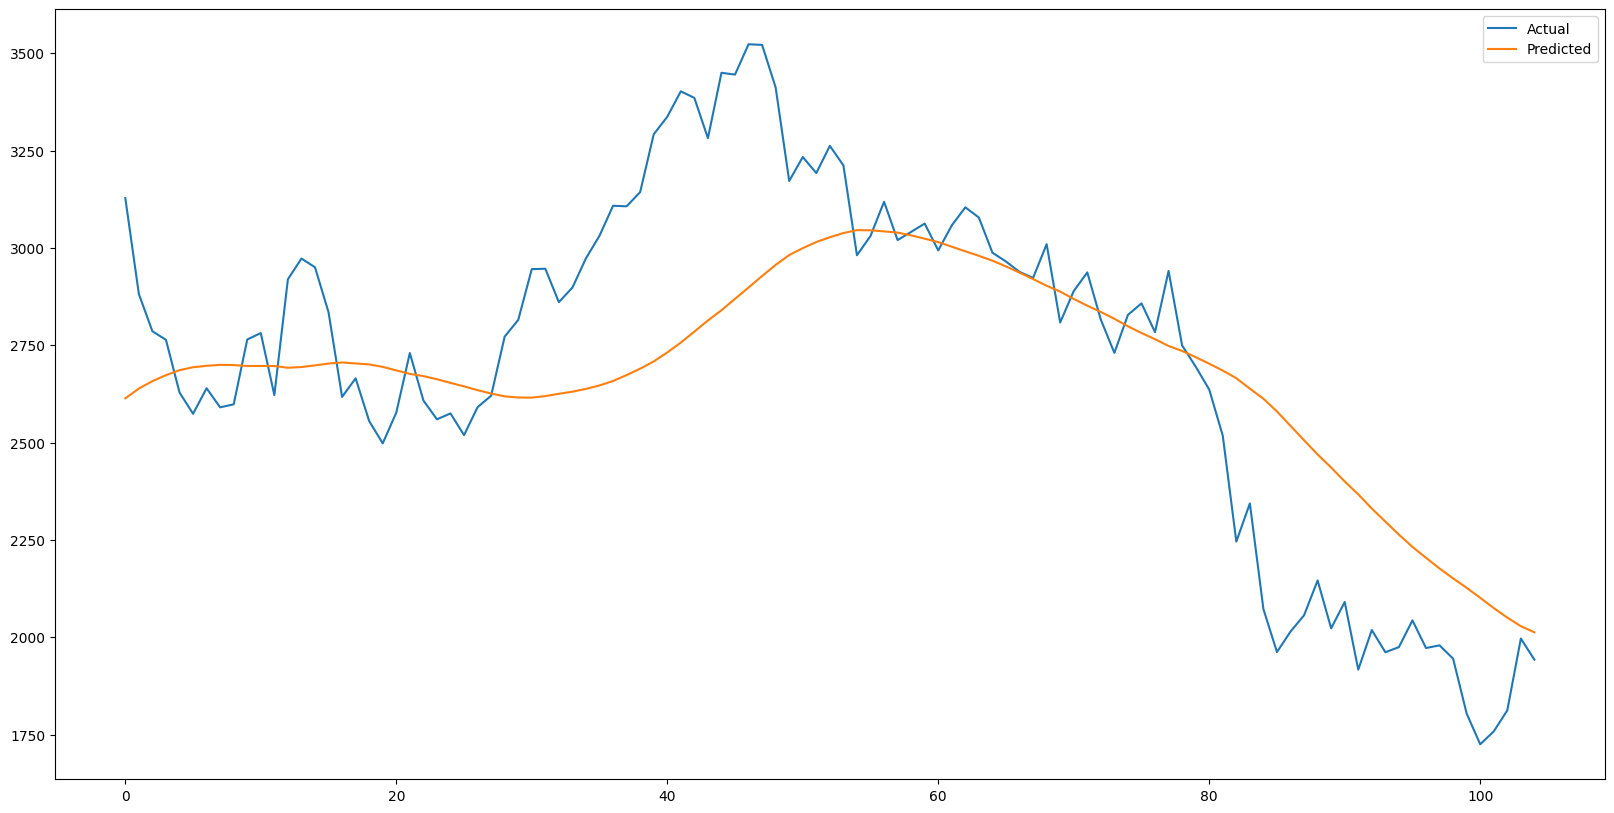

In [68]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_60_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_60_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [69]:
rmse_60 = np.sqrt(np.mean((test_60_results_unscaled['Actual'] - test_60_results_unscaled['Predicted'])**2))
mae_60 = np.mean(np.abs(test_60_results_unscaled['Actual'] - test_60_results_unscaled['Predicted']))
rmse_60, mae_60

(285.87761932852214, 218.33745698474704)

# Comparing the models 

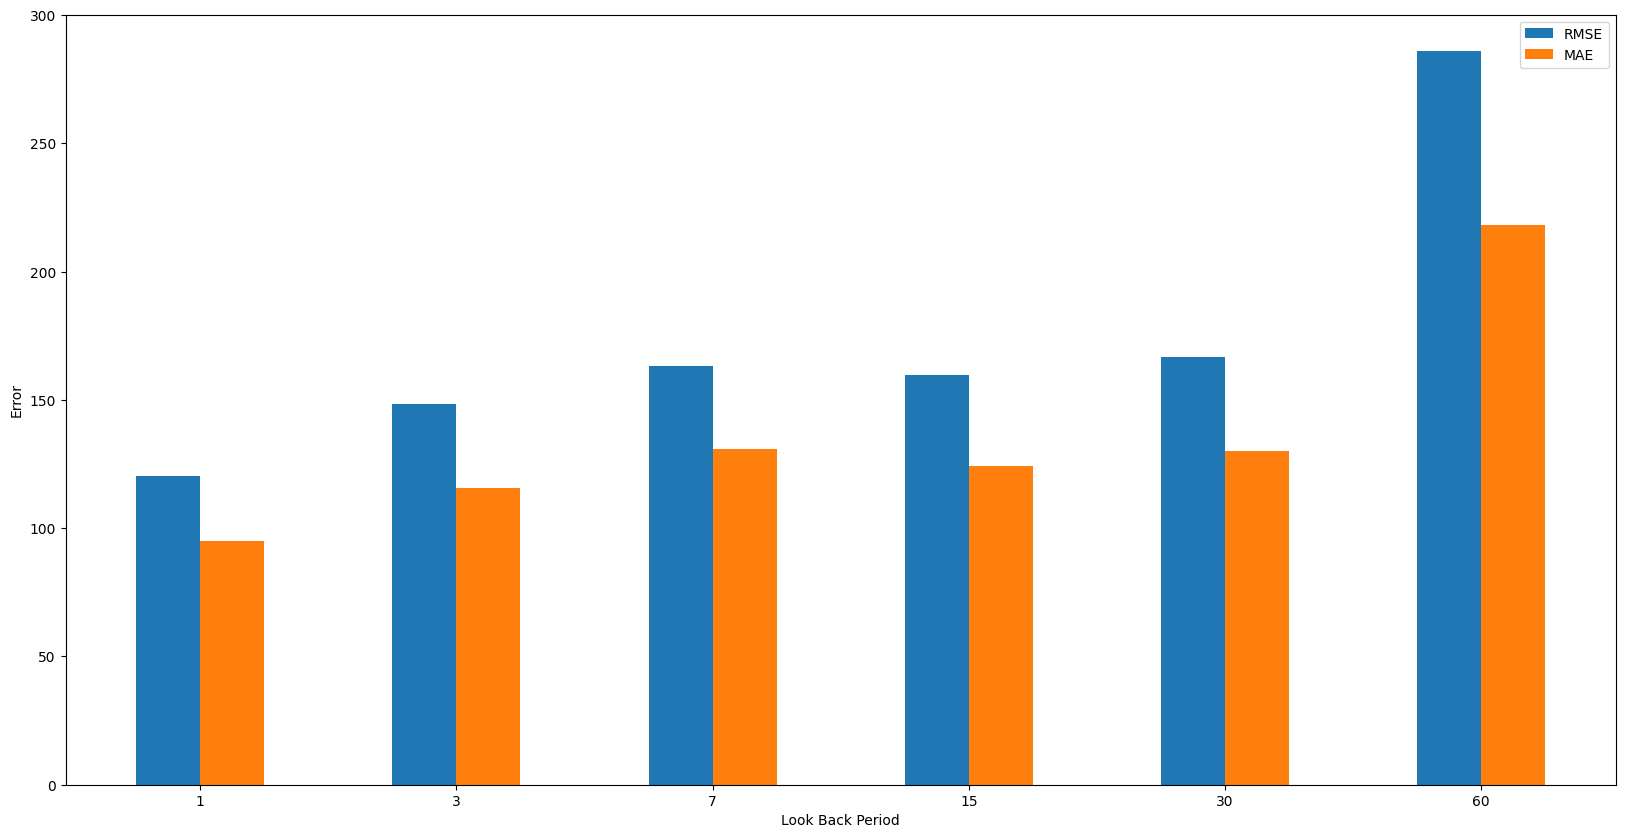

In [70]:
# Plotting in a bar chart, the RMSE and MAE for each look back period. The two metrics are plotted side by side for each look back period
plt.figure(figsize = (20, 10))
plt.bar(np.arange(6), [rmse, rmse_3, rmse_7, rmse_15, rmse_30, rmse_60], width = 0.25, label = 'RMSE')
plt.bar(np.arange(6) + 0.25, [mae, mae_3, mae_7, mae_15, mae_30, mae_60], width = 0.25, label = 'MAE')
plt.xticks(np.arange(6) + 0.125, ['1', '3', '7', '15', '30', '60'])
plt.xlabel('Look Back Period')
plt.ylabel('Error')
plt.legend()